<a href="https://colab.research.google.com/github/amitheb/Amitheb21/blob/main/Enhanced24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/soumik12345/MIRNet
%cd MIRNet

Cloning into 'MIRNet'...
remote: Enumerating objects: 251, done.
remote: Counting objects: 100% (251/251), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 251 (delta 114), reused 165 (delta 45), pack-reused 0
Receiving objects: 100% (251/251), 28.13 MiB | 17.26 MiB/s, done.
Resolving deltas: 100% (114/114), done.
/content/MIRNet


In [2]:
!pip install -q wandb

     |████████████████████████████████| 1.7 MB 5.1 MB/s 
     |████████████████████████████████| 97 kB 4.9 MB/s 
     |████████████████████████████████| 139 kB 41.1 MB/s 
     |████████████████████████████████| 180 kB 52.1 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 


In [3]:
from glob import glob
from PIL import Image
from matplotlib import pyplot as plt
from mirnet.inference import Inferer
from mirnet.utils import download_dataset, plot_result

import tensorflow as tf
import numpy as np
print(tf.__version__)

2.6.0


In [4]:
inferer = Inferer()
inferer.download_weights('1sUlRD5MTRKKGxtqyYDpTv7T3jOW6aVAL')
inferer.build_model(
    num_rrg=3, num_mrb=2, channels=64,
    weights_path='low_light_weights_best.h5'
)
inferer.model.summary()

Downloading...
From: https://drive.google.com/uc?id=1sUlRD5MTRKKGxtqyYDpTv7T3jOW6aVAL
To: /content/MIRNet/low_light_weights_best.h5
100%|██████████| 148M/148M [00:00<00:00, 158MB/s]


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 6 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, None, None, 6 36928       conv2d_1[0][0]                   
______________________________________________________________________________________________

In [5]:
inferer.model.save('mirnet')

INFO:tensorflow:Assets written to: mirnet/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [9]:
IMAGE_LOC = '/Sam Manik Shaw.jpg'

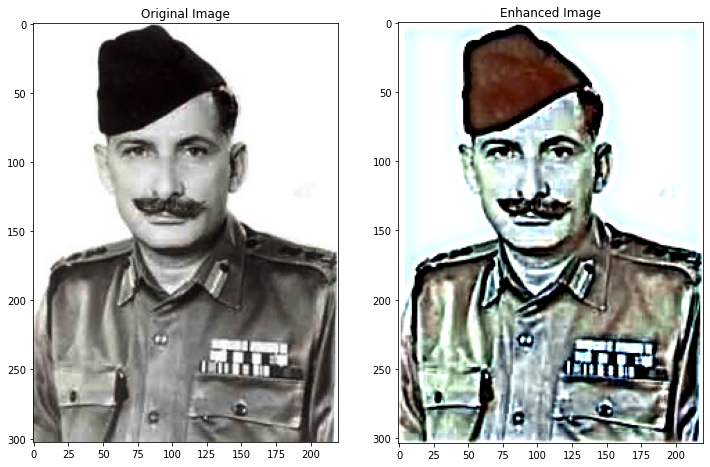

In [10]:
original_image, output_image = inferer.infer(IMAGE_LOC)
plot_result(original_image, output_image)